<a href="https://colab.research.google.com/github/alejandr21/demo/blob/main/Online_shoppers_intention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries.

We begin by importing the libraries that we are going to use through the project.

In [ ]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Loading dataset

We continue with importing and loading our dataset, into the program using pandas library.

In [ ]:
# Load dataset
df_shoppers = pd.read_csv('online_shoppers_intention_final.csv')
print(df_shoppers.info())
print('Shape of dataframe:', df_shoppers.shape)
df_shoppers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ProductRelated           12330 non-null  int64  
 1   ProductRelated_Duration  12330 non-null  float64
 2   BounceRates              12330 non-null  float64
 3   ExitRates                12330 non-null  float64
 4   SpecialDay               12330 non-null  float64
 5   Month                    12330 non-null  object 
 6   OperatingSystems         12330 non-null  int64  
 7   Browser                  12330 non-null  int64  
 8   Region                   12330 non-null  int64  
 9   TrafficType              12330 non-null  int64  
 10  VisitorType              12330 non-null  object 
 11  Weekend                  12330 non-null  bool   
 12  Revenue                  12330 non-null  bool   
dtypes: bool(2), float64(4), int64(5), object(2)
memory usage: 1.1+ MB
None
Shape

,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,0.000000,0.20,0.20,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,2,64.000000,0.00,0.10,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,1,0.000000,0.20,0.20,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,2,2.666667,0.05,0.14,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,10,627.500000,0.02,0.05,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Lets change the name os the second feature.

In [ ]:
# Change the name of second feature.
df_shoppers.rename(columns = {'ProductRelated_Duration':'duration'}, inplace = True)
print(df_shoppers.info())
print('Shape of dataframe:', df_shoppers.shape)
df_shoppers.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ProductRelated    12330 non-null  int64  
 1   duration          12330 non-null  float64
 2   BounceRates       12330 non-null  float64
 3   ExitRates         12330 non-null  float64
 4   SpecialDay        12330 non-null  float64
 5   Month             12330 non-null  object 
 6   OperatingSystems  12330 non-null  int64  
 7   Browser           12330 non-null  int64  
 8   Region            12330 non-null  int64  
 9   TrafficType       12330 non-null  int64  
 10  VisitorType       12330 non-null  object 
 11  Weekend           12330 non-null  bool   
 12  Revenue           12330 non-null  bool   
dtypes: bool(2), float64(4), int64(5), object(2)
memory usage: 1.1+ MB
None
Shape of dataframe: (12330, 13)


,ProductRelated,duration,BounceRates,ExitRates,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,0.000000,0.20,0.20,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,2,64.000000,0.00,0.10,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,1,0.000000,0.20,0.20,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,2,2.666667,0.05,0.14,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,10,627.500000,0.02,0.05,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Drop unncessary columns.

In [ ]:
# Drop 'OperatingSystems	Browser' columns
df_shoppers = df_shoppers.drop(['OperatingSystems',	'Browser'], axis=1)
df_shoppers.head()

,ProductRelated,duration,BounceRates,ExitRates,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend,Revenue
0,1,0.000000,0.20,0.20,0.0,Feb,1,1,Returning_Visitor,False,False
1,2,64.000000,0.00,0.10,0.0,Feb,1,2,Returning_Visitor,False,False
2,1,0.000000,0.20,0.20,0.0,Feb,9,3,Returning_Visitor,False,False
3,2,2.666667,0.05,0.14,0.0,Feb,2,4,Returning_Visitor,False,False
4,10,627.500000,0.02,0.05,0.0,Feb,1,4,Returning_Visitor,True,False


# Distribution of relevant data.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


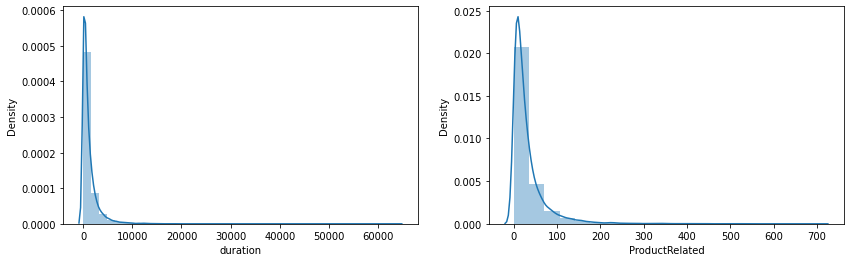

In [ ]:
# Distribution of Duration
#Distribution of Data.
plt.figure(figsize=(14,4))
plt.subplot(1,2,1) 
A1 = sns.distplot(df_shoppers.duration, bins=40)
plt.subplot(1,2,2) 
B1 = sns.distplot(df_shoppers.ProductRelated, bins=20)

Now we will make some box plots for our dataset.

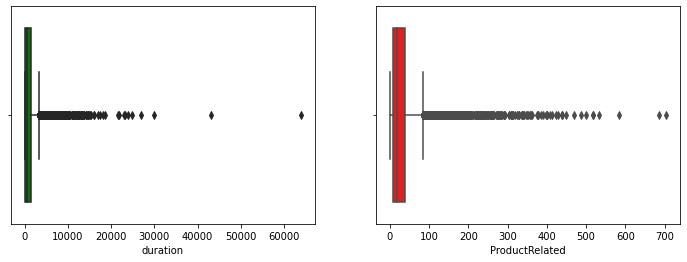

In [ ]:
#We proceed to perform some box plot for some features.
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
g2 = sns.boxplot(x=df_shoppers["duration"], color= "green")
plt.subplot(1,2,2)
g3 = sns.boxplot(x=df_shoppers["ProductRelated"], color= "red")

# Class distribution.

We proceed to review our class distribution of our target feature.

In [ ]:
df_shoppers['Revenue'].value_counts()

False    10422
True      1908
Name: Revenue, dtype: int64

Now we will plot some bar plots for these distributions.

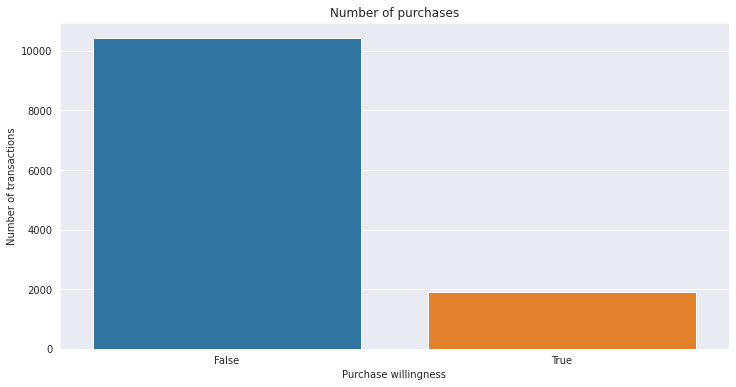

In [ ]:
Payment_Success = df_shoppers.Revenue.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
sns.barplot(x= Payment_Success.index, y= Payment_Success.values)
plt.title("Number of purchases")
plt.xlabel("Purchase willingness")
plt.ylabel("Number of transactions")
plt.show()

Below we can the people's region where these transactions came from.

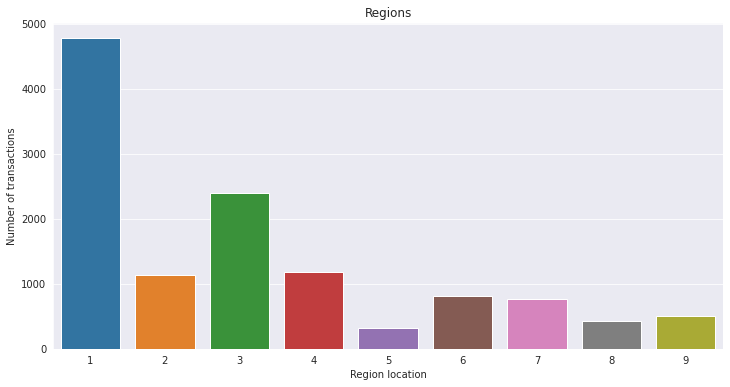

In [ ]:
Region_location = df_shoppers.Region.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
sns.barplot(x= Region_location.index, y= Region_location.values)
plt.title("Regions")
plt.xlabel("Region location")
plt.ylabel("Number of transactions")
plt.show()

Below we can see the frequency of these purchases months.

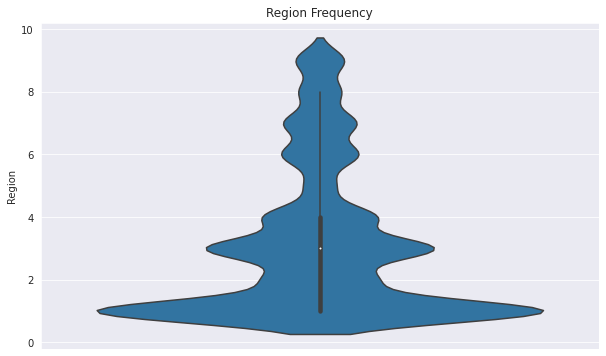

In [ ]:
plt.figure(figsize=(10,6))
plt.title("Region Frequency")
sns.axes_style("dark")
sns.violinplot(y=df_shoppers["Region"])
plt.show()

Additionally we will determine the months that these purchases were done.

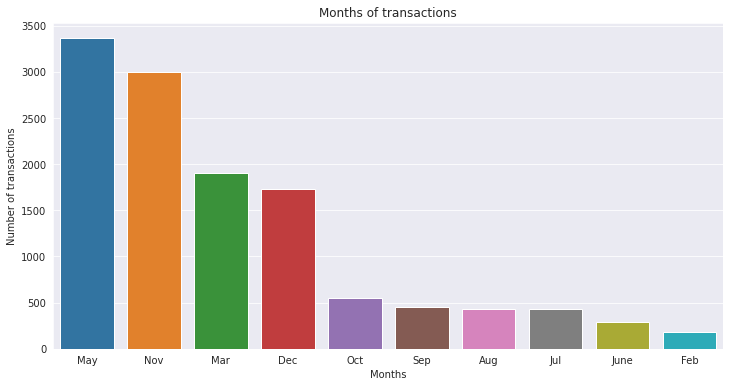

In [ ]:
Months_transactions = df_shoppers.Month.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
sns.barplot(x= Months_transactions.index, y= Months_transactions.values)
plt.title("Months of transactions")
plt.xlabel("Months")
plt.ylabel("Number of transactions")
plt.show()

# Check for missing values

We will check for any missing values in our dataset, to avoid further errors or erroneous predictions.

In [ ]:
df_shoppers.isnull().sum()

ProductRelated    0
duration          0
BounceRates       0
ExitRates         0
SpecialDay        0
Month             0
Region            0
TrafficType       0
VisitorType       0
Weekend           0
Revenue           0
dtype: int64

We now will drop operating system and browser since it does not affect the decision of a customer purchase interest.

# Scaling numerical data.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_shoppers_ready = df_shoppers.copy()

scaler = StandardScaler()
num_cols = ['ProductRelated', 'duration', 'BounceRates', 'ExitRates','SpecialDay', 'Region', 'TrafficType']
df_shoppers_ready[num_cols] = scaler.fit_transform(df_shoppers_ready[num_cols])

df_shoppers_ready.head()

,ProductRelated,duration,BounceRates,ExitRates,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.691003,-0.624348,3.667189,3.229316,-0.308821,Feb,-0.894178,-0.762629,Returning_Visitor,False,False
1,-0.668518,-0.590903,-0.457683,1.171473,-0.308821,Feb,-0.894178,-0.514182,Returning_Visitor,False,False
2,-0.691003,-0.624348,3.667189,3.229316,-0.308821,Feb,2.437081,-0.265735,Returning_Visitor,False,False
3,-0.668518,-0.622954,0.573535,1.994610,-0.308821,Feb,-0.477771,-0.017289,Returning_Visitor,False,False
4,-0.488636,-0.296430,-0.045196,0.142551,-0.308821,Feb,-0.894178,-0.017289,Returning_Visitor,True,False


# Encoding Cathegorical data.

Now we must transform all our text cathegorical data in numerical, which we will do thorugh the following command.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
cat_cols = ['Month', 'VisitorType', 'Weekend']

# Encode Categorical Data
df_encoded = pd.DataFrame(encoder.fit_transform(df_shoppers_ready[cat_cols]))
df_encoded.columns = encoder.get_feature_names(cat_cols)

# Replace Categotical Data with Encoded Data
df_shoppers_ready = df_shoppers_ready.drop(cat_cols ,axis=1)
df_shoppers_ready = pd.concat([df_encoded, df_shoppers_ready], axis=1)

# Encode target value
#df_shoppers_ready['Revenue'] = df_shoppers_ready['Revenue'].apply(lambda x:1 if x == 'True' else 0)
df_shoppers_ready['Revenue'] = df_shoppers_ready['Revenue'].astype(int)

print('Shape of dataframe:', df_shoppers_ready.shape)
df_shoppers_ready.head()

Shape of dataframe: (12330, 23)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,...,Weekend_False,Weekend_True,ProductRelated,duration,BounceRates,ExitRates,SpecialDay,Region,TrafficType,Revenue
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.691003,-0.624348,3.667189,3.229316,-0.308821,-0.894178,-0.762629,0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.668518,-0.590903,-0.457683,1.171473,-0.308821,-0.894178,-0.514182,0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.691003,-0.624348,3.667189,3.229316,-0.308821,2.437081,-0.265735,0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.668518,-0.622954,0.573535,1.994610,-0.308821,-0.477771,-0.017289,0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,-0.488636,-0.296430,-0.045196,0.142551,-0.308821,-0.894178,-0.017289,0


In [ ]:
#Label encoder order is alphabetical
#from sklearn.preprocessing import LabelEncoder
#labelencoder_X = LabelEncoder()
#df_shoppers_ready['Month']     = labelencoder_X.fit_transform(df_shoppers_ready['Month']) 
#df_shoppers_ready['VisitorType']       = labelencoder_X.fit_transform(df_shoppers_ready['VisitorType']) 
#df_shoppers_ready['OperatingSystems'] = labelencoder_X.fit_transform(df_shoppers_ready['OperatingSystems']) 
#df_shoppers_ready['Browser'] = labelencoder_X.fit_transform(df_shoppers_ready['Browser']) 
#df_shoppers_ready['Weekend'] = labelencoder_X.fit_transform(df_shoppers_ready['Weekend'])


#print('Shape of dataframe:', df_shoppers_ready.shape)
#df_shoppers_ready.head()

In [ ]:
# Encode target value
#df_shoppers_ready['Revenue'] = df_shoppers_ready['Revenue'].apply(lambda x: 1 if x == 'True' else 0)

#print('Shape of dataframe:', df_shoppers_ready.shape)
#df_shoppers_ready.head()

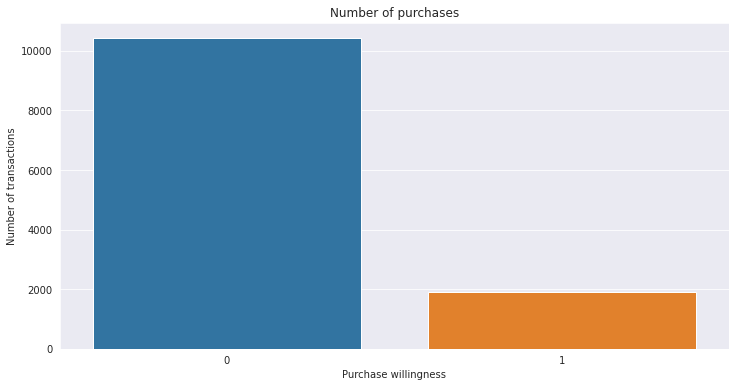

In [ ]:
Revenue_Success = df_shoppers_ready.Revenue.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(12,6))
sns.barplot(x= Revenue_Success.index, y= Revenue_Success.values)
plt.title("Number of purchases")
plt.xlabel("Purchase willingness")
plt.ylabel("Number of transactions")
plt.show()

# Correlation of our taget feature with the cathegorical ones.

Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

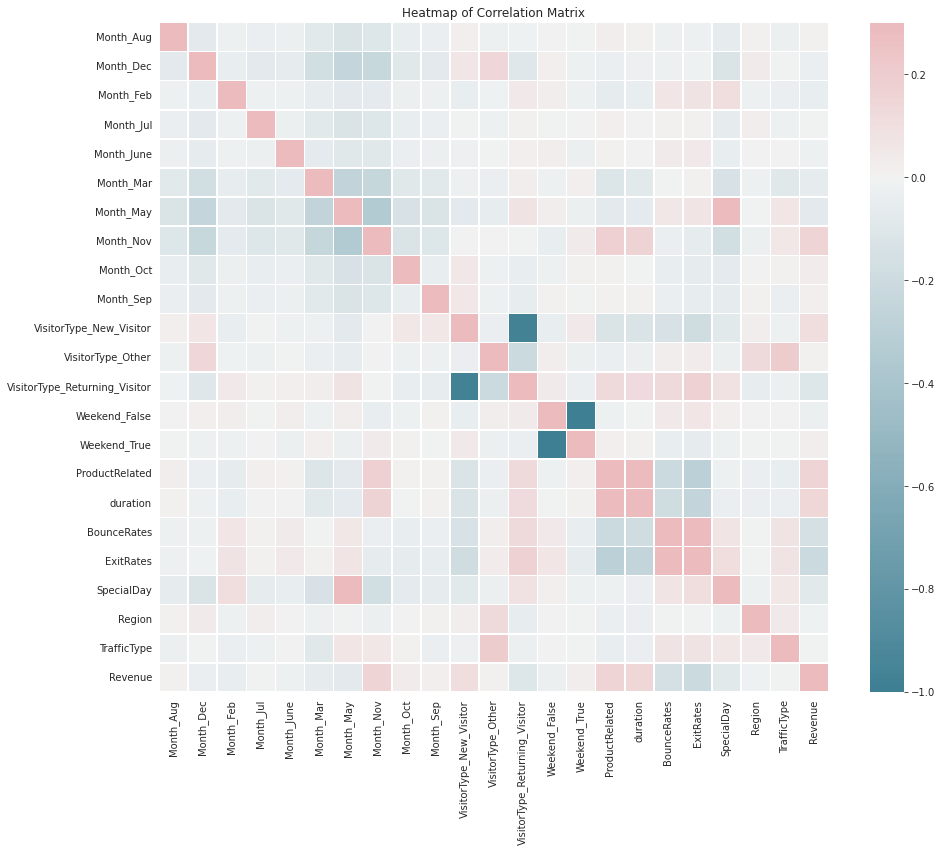

In [ ]:
corr = df_shoppers_ready.corr()
# Heatmap
plt.figure(figsize = (15,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Heatmap of Correlation Matrix')

Now we will extract the deposit column for our further modeling, the fun part haha

In [ ]:
# Extract the Revenue_cat column (the dependent variable)
corr_shoppers = pd.DataFrame(corr['Revenue'].drop('Revenue'))
corr_shoppers.sort_values(by = 'Revenue', ascending = False)

,Revenue
ProductRelated,0.158538
Month_Nov,0.154774
duration,0.152373
VisitorType_New_Visitor,0.104136
Month_Oct,0.032666
Weekend_True,0.029295
Month_Sep,0.019983
Month_Aug,0.010959
VisitorType_Other,0.007715
Month_Jul,-0.001036


# Split Dataset for training and testing.

We proceed to split our data set to test and train with the following commands.

In [ ]:
# Select Features
feature = df_shoppers_ready.drop('Revenue', axis=1)

# Select Target
target = df_shoppers_ready['Revenue']

# Set Training and Testing Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature , target, 
                                                    shuffle = True, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Show the Training and Testing Data
print('Shape of training feature:', X_train.shape)
print('Shape of testing feature:', X_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of training label:', y_test.shape)

Shape of training feature: (9864, 22)
Shape of testing feature: (2466, 22)
Shape of training label: (9864,)
Shape of training label: (2466,)


# Modeling.

Now we go to the money and interesting section (modeling), we will run a decision tree, random forest and KNN algorithm then compare them and decide which one is the best approach for our model.

In [ ]:
def evaluate_model(model, x_test, y_test):
    from sklearn import metrics

    # Predict Test Data 
    y_pred = model.predict(x_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    kappa = metrics.cohen_kappa_score(y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(y_test, y_pred)

    disp = metrics.ConfusionMatrixDisplay(cm)
    disp.plot()
    plt.show()

    print(metrics.classification_report(y_test, y_pred))

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa, 
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

We start wiht the decision tree.

In [ ]:
from sklearn import tree

# Building Decision Tree model 
dtc = tree.DecisionTreeClassifier(criterion="entropy", random_state=0, max_depth=6)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

Once created we proceed witht the evaluation of the same.

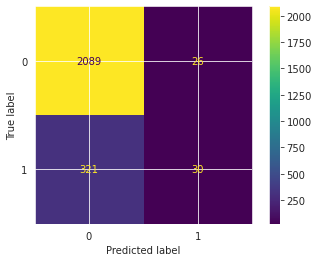

              precision    recall  f1-score   support

           0       0.87      0.99      0.92      2115
           1       0.54      0.09      0.15       351

    accuracy                           0.86      2466
   macro avg       0.70      0.54      0.54      2466
weighted avg       0.82      0.86      0.81      2466

Accuracy: 0.8592862935928629
Precision: 0.5357142857142857
Recall: 0.08547008547008547
F1 Score: 0.14742014742014742
Cohens Kappa Score: 0.11266448903406434
Area Under Curve: 0.7575821866602008


In [ ]:
# Evaluate Model
dtc_eval = evaluate_model(dtc, X_test, y_test)

# Print result
print('Accuracy:', dtc_eval['acc'])
print('Precision:', dtc_eval['prec'])
print('Recall:', dtc_eval['rec'])
print('F1 Score:', dtc_eval['f1'])
print('Cohens Kappa Score:', dtc_eval['kappa'])
print('Area Under Curve:', dtc_eval['auc'])


Now we proceed to plot the figure of our decision tree.

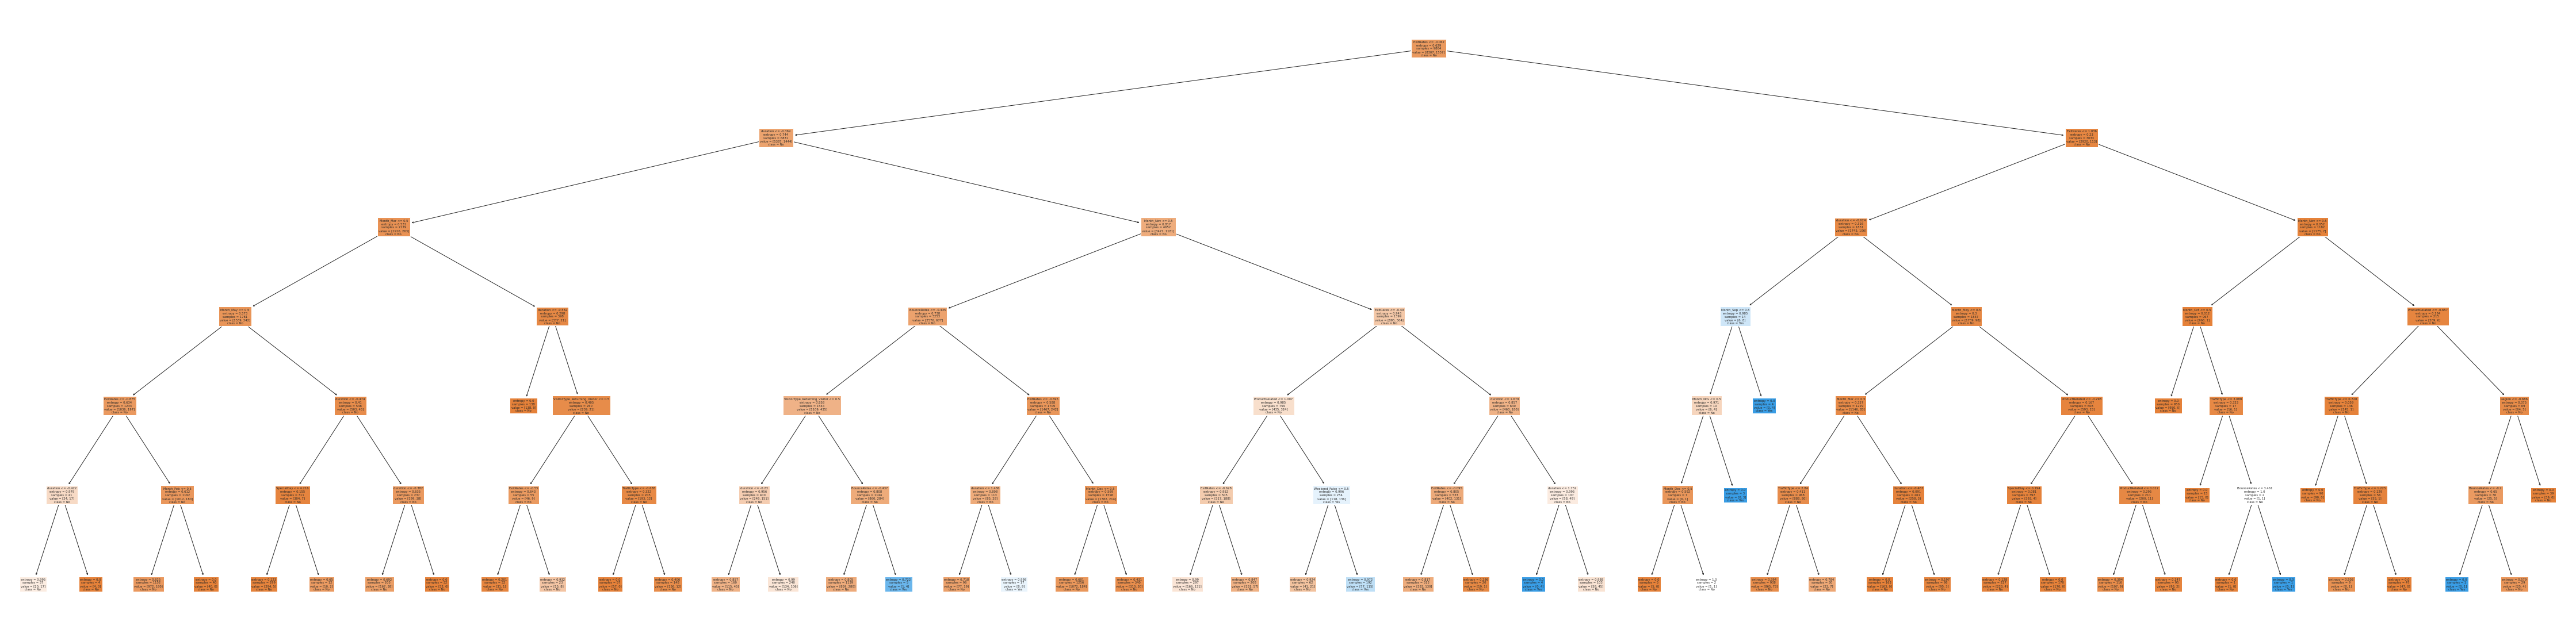

In [ ]:
text_representation = tree.export_text(dtc)
fig = plt.figure(figsize=(80,20))
tree.plot_tree(dtc, 
                   feature_names=X_train.columns,  
                   class_names=["No","Yes"],
                   filled=True)
fig.savefig("decistion_tree.png",bbox_inches = 'tight')


with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

# Random Forest

We proceed to create our random forest algorithm.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest model 
rf = RandomForestClassifier(n_estimators = 20, random_state=0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20, random_state=0)

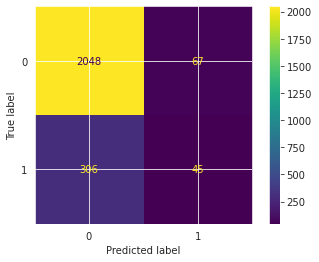

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2115
           1       0.40      0.13      0.19       351

    accuracy                           0.85      2466
   macro avg       0.64      0.55      0.56      2466
weighted avg       0.80      0.85      0.81      2466

Accuracy: 0.8487429034874291
Precision: 0.4017857142857143
Recall: 0.1282051282051282
F1 Score: 0.19438444924406045
Cohens Kappa Score: 0.13480520799823914
Area Under Curve: 0.7470833080762158
Confusion Matrix:
 [[2048   67]
 [ 306   45]]


In [ ]:
# Evaluate Model
rf_eval = evaluate_model(rf, X_test, y_test)

# Print result
print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Cohens Kappa Score:', rf_eval['kappa'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:\n', rf_eval['cm'])

# K Nearest Neighbor.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model 
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

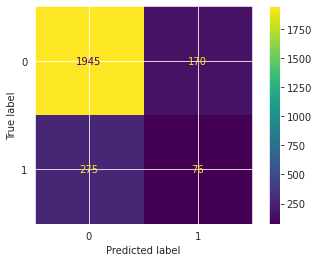

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      2115
           1       0.31      0.22      0.25       351

    accuracy                           0.82      2466
   macro avg       0.59      0.57      0.58      2466
weighted avg       0.80      0.82      0.81      2466

Accuracy: 0.8195458231954582
Precision: 0.3089430894308943
Recall: 0.21652421652421652
F1 Score: 0.254606365159129
Cohens Kappa Score: 0.15555093843063927
Area Under Curve: 0.6545850087221246
Confusion Matrix:
 [[1945  170]
 [ 275   76]]


In [ ]:
# Evaluate Model
knn_eval = evaluate_model(knn, X_test, y_test)

# Print result
print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Cohens Kappa Score:', knn_eval['kappa'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:\n', knn_eval['cm'])

# Model Comparisson.

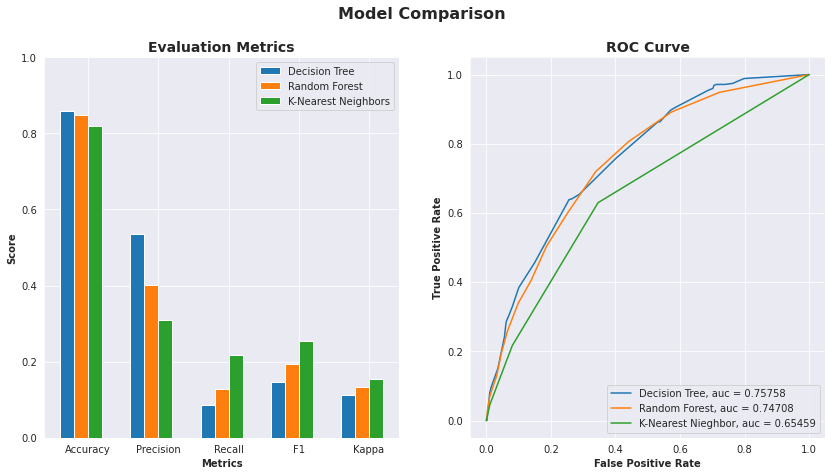

In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
dtc_score = [dtc_eval['acc'], dtc_eval['prec'], dtc_eval['rec'], dtc_eval['f1'], dtc_eval['kappa']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1'], knn_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(dtc_score))
r2 = [x + barWidth for x in r1]
r4 = [x + barWidth for x in r2]

## Make the plot
ax1.bar(r1, dtc_score, width=barWidth, edgecolor='white', label='Decision Tree')
ax1.bar(r2, rf_score, width=barWidth, edgecolor='white', label='Random Forest')
ax1.bar(r4, knn_score, width=barWidth, edgecolor='white', label='K-Nearest Neighbors')

## Configure x and y axis
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

## Create legend & title
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(dtc_eval['fpr'], dtc_eval['tpr'], label='Decision Tree, auc = {:0.5f}'.format(dtc_eval['auc']))
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label='K-Nearest Nieghbor, auc = {:0.5f}'.format(knn_eval['auc']))

## Configure x and y axis
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

## Create legend & title
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()

# Determining the optimal model for our dataset.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 

# 1. n_estimators: The n_estimators parameter specifies the number of trees in the forest of the model. The default value for this parameter is 10, which means that 10 different decision trees will be constructed in the random forest.
# 2. max_depth: The max_depth parameter specifies the maximum depth of each tree. The default value for max_depth is None, which means that each tree will expand until every leaf is pure. A pure leaf is one where all of the data on the leaf comes from the same class.
# 3. min_samples_split: The min_samples_split parameter specifies the minimum number of samples required to split an internal leaf node. The default value for this parameter is 2, which means that an internal node must have at least two samples before it can be split to have a more specific classification.
# 4. min_samples_leaf: The min_samples_leaf parameter specifies the minimum number of samples required to be at a leaf node. The default value for this parameter is 1, which means that every leaf must have at least 1 sample that it classifies.

param_grid = {
    'max_depth': [4, 6, 8],
    #'criterion': ["gini", "entropy"],
    'n_estimators': [50, 150, 200],
    'min_samples_leaf': [1, 3],
    'min_samples_split': [2, 4]
}

# Create a base model
rf_grids = RandomForestClassifier(random_state=0)

# Initiate the grid search model
grid_search = GridSearchCV(estimator=rf_grids, param_grid=param_grid, scoring='f1',
                           cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


{'max_depth': 8,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 150}

Evaluating the new model.

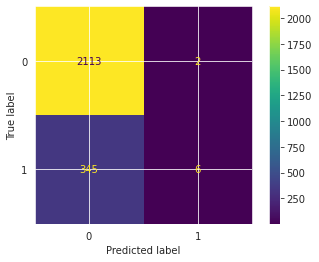

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      2115
           1       0.75      0.02      0.03       351

    accuracy                           0.86      2466
   macro avg       0.80      0.51      0.48      2466
weighted avg       0.84      0.86      0.80      2466

Accuracy: 0.8592862935928629
Precision: 0.75
Recall: 0.017094017094017096
F1 Score: 0.033426183844011144
Cohens Kappa Score: 0.027255427554173206
Area Under Curve: 0.7853010311639154
Confusion Matrix:
 [[2113    2]
 [ 345    6]]


In [ ]:
# Select best model with best fit
best_grid = grid_search.best_estimator_

# Evaluate Model
best_grid_eval = evaluate_model(best_grid, X_test, y_test)

# Print result
print('Accuracy:', best_grid_eval['acc'])
print('Precision:', best_grid_eval['prec'])
print('Recall:', best_grid_eval['rec'])
print('F1 Score:', best_grid_eval['f1'])
print('Cohens Kappa Score:', best_grid_eval['kappa'])
print('Area Under Curve:', best_grid_eval['auc'])
print('Confusion Matrix:\n', best_grid_eval['cm'])

Comparing the models once again.

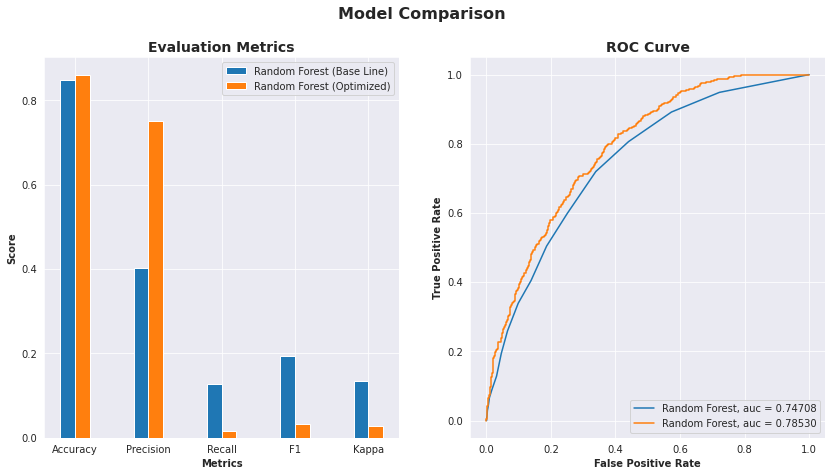

Change of 1.24% on accuracy.
Change of 86.67% on precision.
Change of -86.67% on recall.
Change of -82.80% on F1 score.
Change of -79.78% on Kappa score.
Change of 5.12% on AUC.


In [ ]:
# Intitialize figure with two plots
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# First plot
## set bar size
barWidth = 0.2
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1'], rf_eval['kappa']]
best_grid_score = [best_grid_eval['acc'], best_grid_eval['prec'], best_grid_eval['rec'], best_grid_eval['f1'], best_grid_eval['kappa']]

## Set position of bar on X axis
r1 = np.arange(len(rf_score))
r2 = [x + barWidth for x in r1]

## Make the plot
ax1.bar(r1, rf_score, width=barWidth, edgecolor='white', label='Random Forest (Base Line)')
ax1.bar(r2, best_grid_score, width=barWidth, edgecolor='white', label='Random Forest (Optimized)')

## Add xticks on the middle of the group bars
ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1', 'Kappa']
ax1.set_xticks([r + (barWidth * 0.5) for r in range(len(dtc_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
# ax1.set_ylim(0, 1)

## Create legend & Show graphic
ax1.set_title('Evaluation Metrics', fontsize=14, fontweight='bold')
ax1.legend()

# Second plot
## Comparing ROC Curve
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(rf_eval['auc']))
ax2.plot(best_grid_eval['fpr'], best_grid_eval['tpr'], label='Random Forest, auc = {:0.5f}'.format(best_grid_eval['auc']))

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')
ax2.legend(loc=4)

plt.show()

print('Change of {:0.2f}% on accuracy.'.format(100 * ((best_grid_eval['acc'] - rf_eval['acc']) / rf_eval['acc'])))
print('Change of {:0.2f}% on precision.'.format(100 * ((best_grid_eval['prec'] - rf_eval['prec']) / rf_eval['prec'])))
print('Change of {:0.2f}% on recall.'.format(100 * ((best_grid_eval['rec'] - rf_eval['rec']) / rf_eval['rec'])))
print('Change of {:0.2f}% on F1 score.'.format(100 * ((best_grid_eval['f1'] - rf_eval['f1']) / rf_eval['f1'])))
print('Change of {:0.2f}% on Kappa score.'.format(100 * ((best_grid_eval['kappa'] - rf_eval['kappa']) / rf_eval['kappa'])))
print('Change of {:0.2f}% on AUC.'.format(100 * ((best_grid_eval['auc'] - rf_eval['auc']) / rf_eval['auc'])))

# Prediction

In [ ]:
df_shoppers['shoppers_prediction'] = rf.predict(feature)
df_shoppers['shoppers_prediction'] = df_shoppers['shoppers_prediction'].apply(lambda x: 'yes' if x==0 else 'no')

# Save new dataframe into csv file
df_shoppers.to_csv('shoppers_prediction.csv', index=False)

df_shoppers.head(10)

,ProductRelated,duration,BounceRates,ExitRates,SpecialDay,Month,Region,TrafficType,VisitorType,Weekend,Revenue,shoppers_prediction
0,1,0.000000,0.200000,0.200000,0.0,Feb,1,1,Returning_Visitor,False,False,yes
1,2,64.000000,0.000000,0.100000,0.0,Feb,1,2,Returning_Visitor,False,False,yes
2,1,0.000000,0.200000,0.200000,0.0,Feb,9,3,Returning_Visitor,False,False,yes
3,2,2.666667,0.050000,0.140000,0.0,Feb,2,4,Returning_Visitor,False,False,yes
4,10,627.500000,0.020000,0.050000,0.0,Feb,1,4,Returning_Visitor,True,False,yes
5,19,154.216667,0.015789,0.024561,0.0,Feb,1,3,Returning_Visitor,False,False,yes
6,1,0.000000,0.200000,0.200000,0.4,Feb,3,3,Returning_Visitor,False,False,yes
7,0,0.000000,0.200000,0.200000,0.0,Feb,1,5,Returning_Visitor,True,False,yes
8,2,37.000000,0.000000,0.100000,0.8,Feb,2,3,Returning_Visitor,False,False,yes
9,3,738.000000,0.000000,0.022222,0.4,Feb,1,2,Returning_Visitor,False,False,yes
